In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('Live.xls')

In [30]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [32]:
df.drop(columns = ['Column1', 'Column2', 'Column3', 'Column4'], inplace = True)

In [33]:
df['status_id'].nunique()

6997

In [34]:
df['status_published'].nunique()

6913

In [35]:
df.drop(columns = ['status_id', 'status_published'], inplace = True)

In [36]:
df['status_type'].value_counts()

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

In [37]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['status_type'] = le.fit_transform(df['status_type'])

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [40]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)

In [41]:
df_scaled.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(df_scaled)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [43]:
df['cluster'] = kmeans.labels_

In [44]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,3,529,512,262,432,92,3,1,1,0,1
1,1,150,0,0,150,0,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0,1
3,1,111,0,0,111,0,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0,0


In [45]:
df['status_type_reversed'] = le.inverse_transform(df['status_type'])

In [46]:
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster,status_type_reversed
0,3,529,512,262,432,92,3,1,1,0,1,video
1,1,150,0,0,150,0,0,0,0,0,0,photo
2,3,227,236,57,204,21,1,1,0,0,1,video
3,1,111,0,0,111,0,0,0,0,0,0,photo
4,1,213,0,0,204,9,0,0,0,0,0,photo


In [47]:
cluster1 = df[df['cluster'] == 0]
cluster2 = df[df['cluster'] == 1]
cluster3 = df[df['cluster'] == 2]

In [48]:
cluster1['status_type_reversed'].unique()

array(['photo', 'link'], dtype=object)

In [49]:
cluster2['status_type_reversed'].unique()

array(['video'], dtype=object)

In [50]:
cluster1.shape, cluster2.shape, cluster3.shape

((4119, 12), (2293, 12), (638, 12))

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def analyze_kmeans_clusters(X, labels, model=None, visualize=True, method='pca'):
    """
    Analyze the quality of KMeans clusters using multiple metrics.

    Parameters:
        X (array-like): The dataset used for clustering.
        labels (array-like): Cluster labels predicted by the model.
        model (KMeans): Trained KMeans model (optional, required for inertia).
        visualize (bool): Whether to visualize clusters in 2D.
        method (str): 'pca' or 'tsne' for dimensionality reduction.

    Returns:
        dict: A dictionary with evaluation metrics and interpretation.
    """
    results = {}

    # Silhouette Score
    sil_score = silhouette_score(X, labels)
    results['silhouette_score'] = sil_score
    print(f"Silhouette Score: {sil_score:.4f} — ", end='')
    if sil_score > 0.7:
        print("Strong structure (well-separated clusters).")
    elif sil_score > 0.5:
        print("Reasonable structure.")
    elif sil_score > 0.25:
        print("Weak structure.")
    else:
        print("No substantial structure (overlapping clusters).")

    # Calinski-Harabasz Index
    ch_score = calinski_harabasz_score(X, labels)
    results['calinski_harabasz_score'] = ch_score
    print(f"Calinski-Harabasz Index: {ch_score:.2f} — Higher is better (better-defined clusters).")

    # Davies-Bouldin Index
    db_score = davies_bouldin_score(X, labels)
    results['davies_bouldin_score'] = db_score
    print(f"Davies-Bouldin Index: {db_score:.4f} — Lower is better (less intra-cluster similarity).")

    # Inertia (if model provided)
    if model is not None and hasattr(model, 'inertia_'):
        inertia = model.inertia_
        results['inertia'] = inertia
        print(f"Inertia: {inertia:.2f} — Total within-cluster sum of squares (lower is tighter).")

    # Cluster size balance
    unique, counts = np.unique(labels, return_counts=True)
    cluster_sizes = dict(zip(unique, counts))
    size_variance = np.var(counts)
    results['cluster_sizes'] = cluster_sizes
    results['size_variance'] = size_variance
    print("Cluster sizes:", cluster_sizes)
    print(f"Size variance: {size_variance:.2f} — Low variance indicates balanced clusters.")

    # Optional 2D Visualization
    if visualize:
        if method == 'tsne':
            reducer = TSNE(n_components=2, perplexity=30, random_state=42)
        else:
            reducer = PCA(n_components=2)
        X_2d = reducer.fit_transform(X)
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=labels, cmap='tab10', alpha=0.6)
        plt.title(f'Cluster visualization using {method.upper()}')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.colorbar(scatter, label='Cluster Label')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    return results

In [52]:
kmeans = KMeans(n_clusters = 4, random_state = 42)
labels = kmeans.fit_predict(df_scaled)

Silhouette Score: 0.7385 — Strong structure (well-separated clusters).
Calinski-Harabasz Index: 13854.73 — Higher is better (better-defined clusters).
Davies-Bouldin Index: 0.5815 — Lower is better (less intra-cluster similarity).
Inertia: 130.33 — Total within-cluster sum of squares (lower is tighter).
Cluster sizes: {np.int32(0): np.int64(4142), np.int32(1): np.int64(2307), np.int32(2): np.int64(325), np.int32(3): np.int64(276)}
Size variance: 2558647.25 — Low variance indicates balanced clusters.


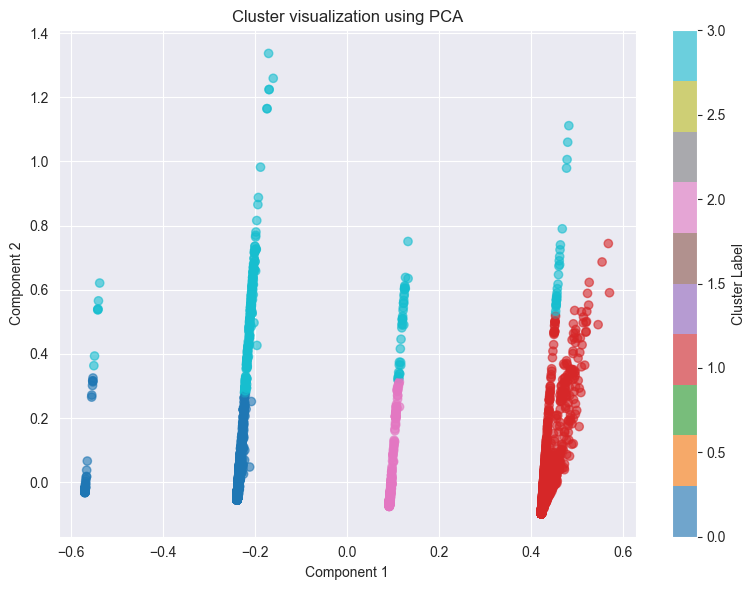

In [53]:
results = analyze_kmeans_clusters(df_scaled, labels, model=kmeans, visualize=True, method='pca')

In [54]:
### histograme - cum difera un cluster fata de celelalte, barchart-uri -observatii pe cluster
### exista outlieri, dimensiunea clusterelor
### Boxplot-uri, violin plots
### scatterplots - 2 variabile si colorate dupa cluster
### Analiza statistica = medii, mediane, deviatii standard, proportii
### INSIGHT